# Tampa Real-Estate Recommender
## Feature Engineering
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the Feature Engineering is to prepare the features and to build training and testing datasets to optimally support the machine learning models in order to predict the sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

In [2]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [3]:
df = pd.read_csv(interim_data + 'sales_df_EDA.csv', dtype={'FOLIO': object, 'DOR_CODE': object, 'NBHC': object, 'SECTION_CD': object, 'TOWNSHIP_CD': object, 'RANGE_CD': object}, parse_dates=['S_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11526 entries, 0 to 11525
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FOLIO            11526 non-null  object        
 1   S_DATE           11526 non-null  datetime64[ns]
 2   S_AMT            11526 non-null  float64       
 3   SUB              11526 non-null  object        
 4   SITE_ADDR        11525 non-null  object        
 5   SITE_CITY        11525 non-null  object        
 6   SITE_ZIP         11526 non-null  object        
 7   tBEDS            11526 non-null  float64       
 8   tBATHS           11526 non-null  float64       
 9   JUST             11526 non-null  float64       
 10  LAND             11526 non-null  float64       
 11  BLDG             11526 non-null  float64       
 12  EXF              11526 non-null  float64       
 13  HEAT_AR          11526 non-null  float64       
 14  SD1              11526 non-null  objec

# 4 Select Features for Engineering<a id='4'></a>

In [4]:
# Replace S_DATE with integer sales date epoch
df['sales_date_epoch'] = (df['S_DATE'] - dt.datetime(1970,1,1)).dt.days

In [5]:
df['NBHC'] = pd.to_numeric(df['NBHC'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11526 entries, 0 to 11525
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FOLIO             11526 non-null  object        
 1   S_DATE            11526 non-null  datetime64[ns]
 2   S_AMT             11526 non-null  float64       
 3   SUB               11526 non-null  object        
 4   SITE_ADDR         11525 non-null  object        
 5   SITE_CITY         11525 non-null  object        
 6   SITE_ZIP          11526 non-null  object        
 7   tBEDS             11526 non-null  float64       
 8   tBATHS            11526 non-null  float64       
 9   JUST              11526 non-null  float64       
 10  LAND              11526 non-null  float64       
 11  BLDG              11526 non-null  float64       
 12  EXF               11526 non-null  float64       
 13  HEAT_AR           11526 non-null  float64       
 14  SD1               1152

In [6]:
# Extract independent feature variables to X
features = ['FOLIO', 'S_DATE', 'SUB', 'sales_date_epoch', 'AGE', 'tBEDS', 'tBATHS', 'HEAT_AR', 'ACREAGE', 'NBHC']
X = df[features] 

In [7]:
# Extract target dependent variable to y
y = df.S_AMT

In [8]:
# Call train_test_split on X, y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9220, 10) (9220,)
(2306, 10) (2306,)


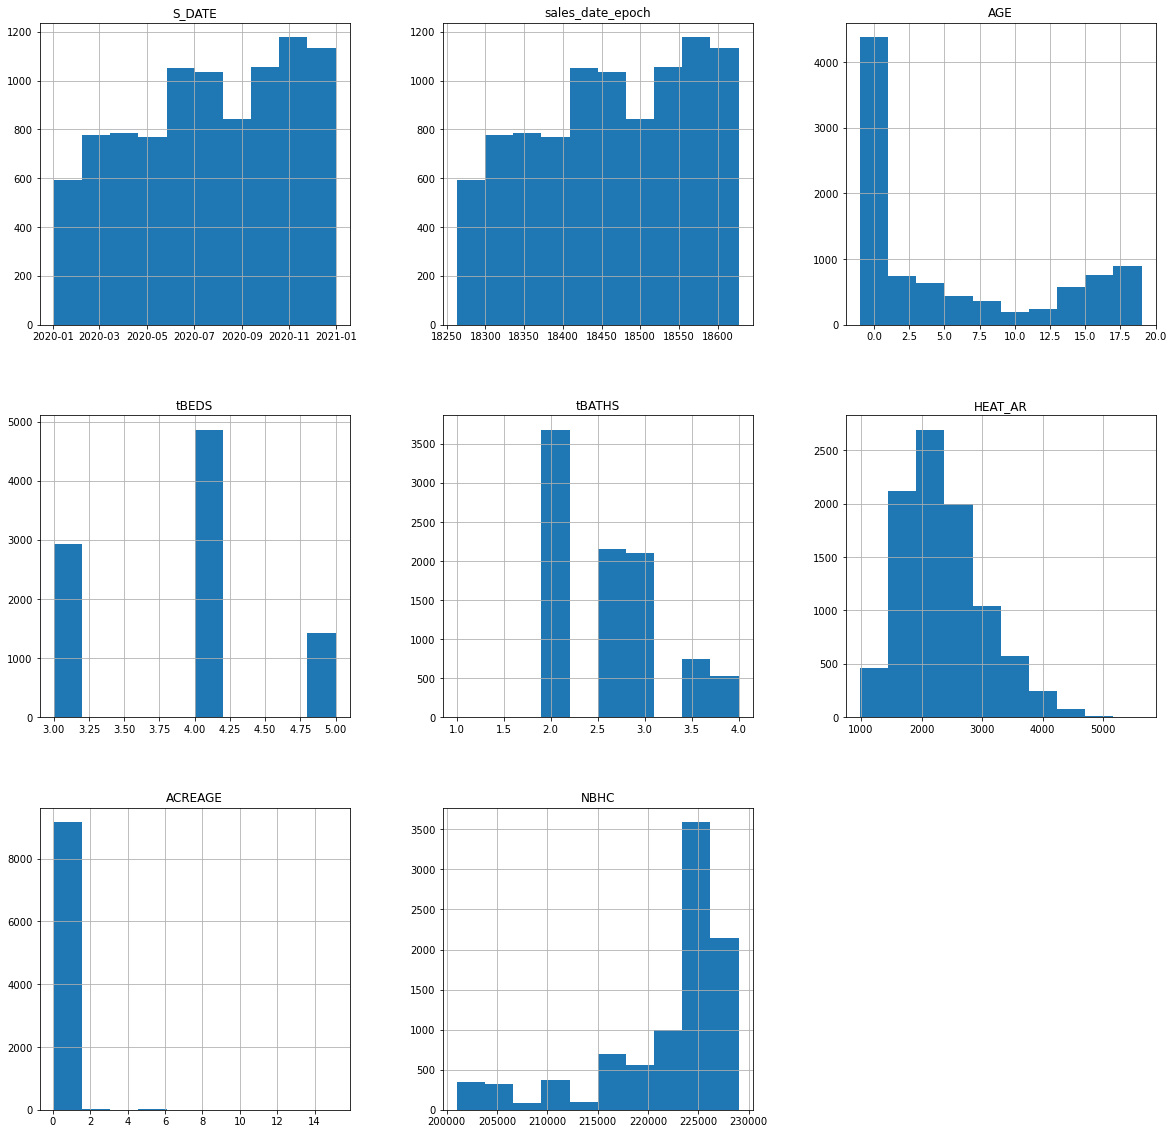

In [9]:
X_train.hist(figsize=(20, 20))
plt.show()

# 5 Encode Features<a id='5'></a>

Hash Encode the Subdivision Code

In [10]:
ce_hash = ce.HashingEncoder(cols = ['SUB'])
X_train = ce_hash.fit_transform(X_train)
X_train.head()

C:\Users\mkars\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,FOLIO,S_DATE,sales_date_epoch,AGE,tBEDS,tBATHS,HEAT_AR,ACREAGE,NBHC
0,0,0,0,0,0,0,0,1,0777752476,2020-11-02,18568,0,4.0,2.5,1914.0,0.132721,226001.0
1,0,0,0,0,0,0,0,1,0237334464,2020-09-30,18535,16,4.0,3.5,3940.0,0.205733,212006.0
2,0,1,0,0,0,0,0,0,0777176588,2020-02-07,18299,5,4.0,3.0,2581.0,0.189396,226015.0
3,0,0,1,0,0,0,0,0,0347530360,2020-07-20,18463,18,3.0,2.0,1059.0,0.092001,215003.0
4,0,0,1,0,0,0,0,0,0491506218,2020-11-10,18576,2,4.0,3.0,2400.0,0.149344,222002.0


In [11]:
X_test = ce_hash.transform(X_test)
X_test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,FOLIO,S_DATE,sales_date_epoch,AGE,tBEDS,tBATHS,HEAT_AR,ACREAGE,NBHC
0,0,0,0,0,0,0,1,0,0777752036,2020-01-10,18271,1,4.0,2.5,2328.0,0.135567,226001.0
1,0,0,1,0,0,0,0,0,0541655458,2020-11-13,18579,0,3.0,2.0,1821.0,0.117328,227003.0
2,0,0,0,0,0,1,0,0,0789321960,2020-08-18,18492,0,5.0,3.0,2207.0,0.145010,229008.0
3,1,0,0,0,0,0,0,0,0777141404,2020-06-02,18415,0,4.0,3.0,2057.0,0.185121,226015.0
4,0,0,0,1,0,0,0,0,0567741258,2020-10-08,18543,7,4.0,2.5,2058.0,0.181141,227001.0


In [ ]:
# ce_target = ce.TargetEncoder()
# X_train['SUB_encoded'] = ce_target.fit_transform(X_train['SUB'], df['target'])

# 6 Scale Features<a id='6'></a>

In [12]:
num_cols = X_train.select_dtypes(include=np.number).columns
num_cols

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'sales_date_epoch', 'AGE', 'tBEDS', 'tBATHS', 'HEAT_AR', 'ACREAGE',
       'NBHC'],
      dtype='object')

In [13]:
# Apply a standard scaler to the training data
X_train_scaled = X_train
SS_scaler = StandardScaler()
X_train_scaled[num_cols] = SS_scaler.fit_transform(X_train_scaled[num_cols])

In [14]:
X_test_scaled = X_test
X_test_scaled[num_cols] = SS_scaler.transform(X_test_scaled[num_cols])

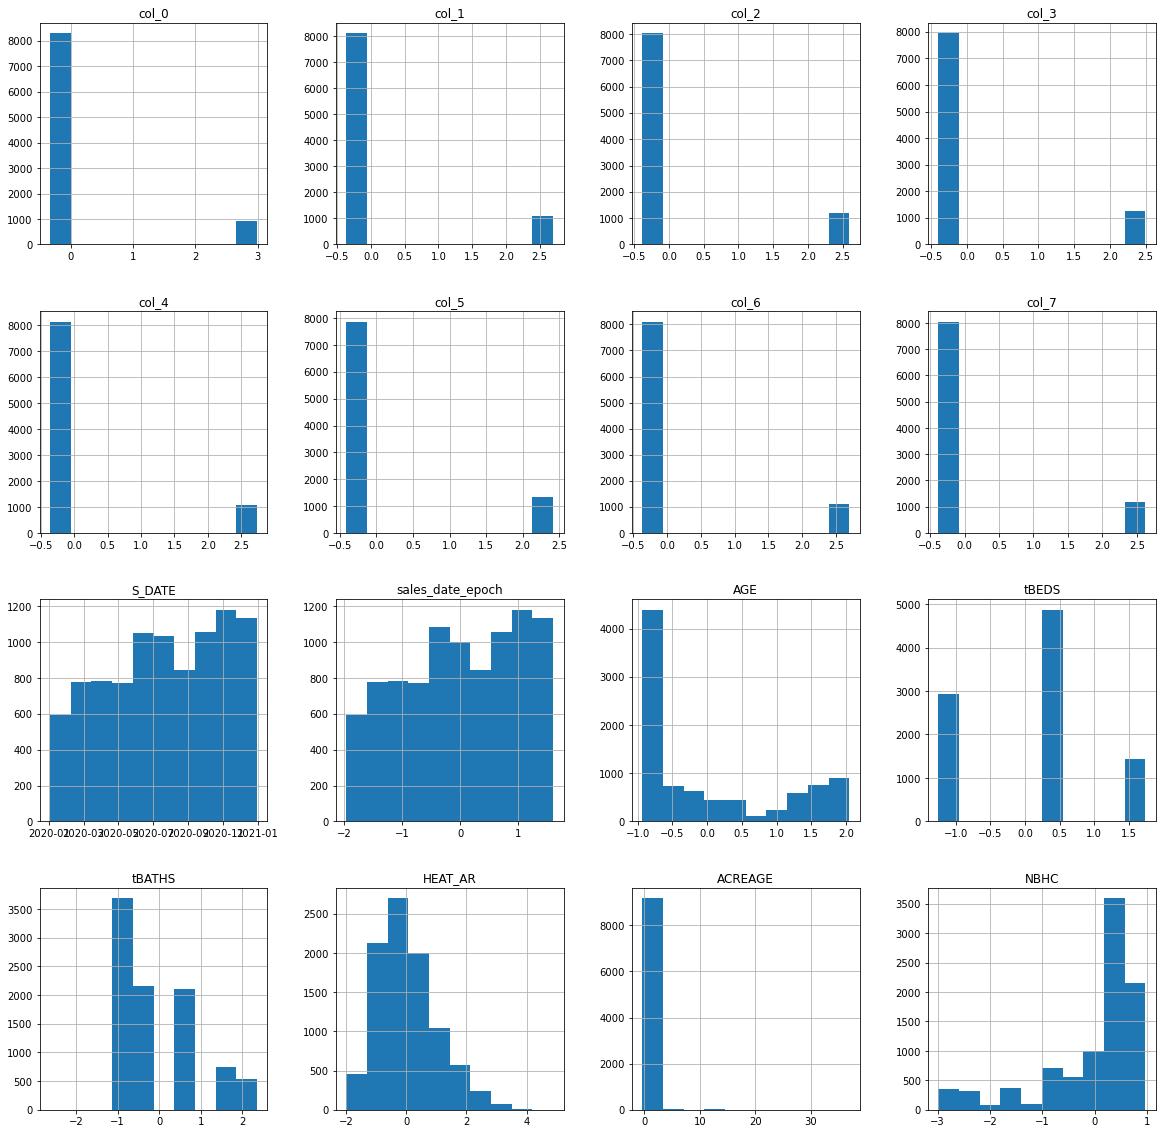

In [15]:
X_train_scaled.hist(figsize=(20, 20))
plt.show()

# 7 Export Train and Test Data to CSV<a id='7'></a>

In [16]:
# Save unscaled data to interim data folder as csv files
X_train.to_csv(interim_data + 'X_train.csv', index=False)
X_test.to_csv(interim_data + 'X_test.csv', index=False)
y_train.to_csv(interim_data + 'y_train.csv', index=False)
y_test.to_csv(interim_data + 'y_test.csv', index=False)

In [17]:
# Save unscaled data to interim data folder as csv files
X_train_scaled.to_csv(interim_data + 'X_train_scaled.csv', index=False)
X_test_scaled.to_csv(interim_data + 'X_test_scaled.csv', index=False)